# LINEAR REGESSION MODEL
Linear regression is a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line.

For example we want to predict a student's exam score based on how many hours they studied. We observe that as students study more hours, their scores go up. In the example of predicting exam scores based on hours studied. Here

Independent variable (input): Hours studied because it's the factor we control or observe.
Dependent variable (output): Exam score because it depends on how many hours were studied.
We use the independent variable to predict the dependent variable.

# OBJECTIVE:-
To predict the output according to the given inputs by assuming that the output depends linearly on the input i.e. their is a linear relationship between the  dependent variable(Y) and the independent variable(X).

# REFERENCES:-
## 📚 References
- [Scikit-learn Documentation: Boston Housing Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset)
- [OpenML Boston Dataset](https://www.openml.org/d/531)
- [Linear Regression Explained - Towards Data Science](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)
- [Gradient Descent for Linear Regression - GeeksforGeeks](https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/)
- [Understanding R² and Adjusted R²](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)
- [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

# Let's first understand the mathematiacl concepts and formulas used in this model

# 📌 Linear Regression: Key Formulas and Explanations

#-------------------------------------------------------------------------------------

## 1. Hypothesis (Prediction Function)

#$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$$

#**Where:**  
#- \( \hat{y} \) → Predicted value  
#- \( \beta_0 \) → Intercept term  
#- \( \beta_j \) → Coefficient for feature \( x_j \)  
#- \( x_j \) → Independent variable  

#-------------------------------------------------------------------------------------------------------------------------------

## 2. Cost Function (Mean Squared Error - MSE)

#$$J(\beta_0, \beta_1, \dots, \beta_n) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2$$

#**Where:**  
#- \( J \) → Cost function  
#- \( m \) → Number of observations  
#- \( y^{(i)} \) → Actual value  
#- \( \hat{y}^{(i)} \) → Predicted value  

#**Alternative (RSS):**  
#$$RSS = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$

#------------------------------------------------------------------------------------------------------------------

## 3. Gradient Descent Update Rule

#For each parameter \( \beta_j \):  
#$$\beta_j := \beta_j - \alpha \frac{\partial J}{\partial \beta_j}$$

#**Where:**  
#$$\frac{\partial J}{\partial \beta_j} = \frac{2}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}$$

#- \( \alpha \) → Learning rate  
#- \( \frac{\partial J}{\partial \beta_j} \) → Gradient for parameter \( \beta_j \)  

#----------------------------------------------------------------------------------------------------------------------

## 4. Normal Equation (Closed Form Solution)

#$$\boldsymbol{\beta} = \left( X^T X \right)^{-1} X^T y$$

#**Where:**  
#- \( X \) → Feature matrix (with ones for intercept)  
#- \( y \) → Target vector  
#- \( \beta \) → Coefficient vector  

#----------------------------------------------------------------------------------------------------------------------

## 5. R-Squared (Coefficient of Determination)

#$$R^2 = 1 - \frac{\sum_{i=1}^{m}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{m}(y_i - \bar{y})^2}$$

#**Where:**  
#- \( R^2 \) → Goodness of fit (0 to 1)  
#- \( \bar{y} \) → Mean of actual values  

#--------------------------------------------------------------------------------------

## 6. Adjusted R-Squared

#$$\bar{R}^2 = 1 - \left(1 - R^2\right) \frac{n-1}{n-p-1}$$

#**Where:**  
#- \( n \) → Number of observations  
#- \( p \) → Number of predictors  

#---------------------------------------------------------------------------------------

## 7. Standard Error of Estimate

#$$SE = \sqrt{\frac{\sum_{i=1}^m (y_i - \hat{y}_i)^2}{m - 2}}$$

#**Purpose:** Measures the average error in predictions  

#--------------------------------------------------------------------------------------

## 8. t-Statistic for Coefficients

#$$t = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}$$

#**Purpose:** Used for hypothesis testing of coefficients  

#-------------------------------------------------------------------------------------

## 9. Confidence Interval for Coefficients

#$$\hat{\beta}_j \pm t_{\alpha/2, n-p-1} \cdot SE(\hat{\beta}_j)$$

#**Purpose:** Interval within which true coefficient likely lies  

#----------------------------------------------



# Import the important libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [20]:
# 1) Load dataset (use OpenML; sklearn's load_boston is deprecated)
boston = fetch_openml(name="boston", version=1, as_frame=True)
X_full: pd.DataFrame = boston.data
y_full: pd.Series = boston.target.astype(float)

print(f"Shape -> X: {X_full.shape}, y: {y_full.shape}")
print("Columns:", list(X_full.columns))

# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=RANDOM_SEED
)

# 3) Standardize features (fit on train only)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


Shape -> X: (506, 13), y: (506,)
Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


# An important observation,Why do we use StandardScaler and scale the datapoints?-----------#Ans) because Gradient Descent works well and efficiently when the datas are scaled.

In [21]:
X_full[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [22]:
y_full[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

# Now, let's build the Linear Regression Model using the above concepts

In [23]:
# 4) Linear Regression from scratch (Batch Gradient Descent)
class LinearRegressionScratch:
    def __init__(self, lr=0.05, epochs=2000, l2=0.0, tol=1e-8, verbose=False):
        """
        lr: learning rate
        epochs: maximum number of passes over the data
        l2: L2 regularization strength (Ridge). 0.0 means no regularization.
        tol: early-stopping tolerance on relative loss improvement
        """
        self.lr = lr
        self.epochs = epochs
        self.l2 = l2
        self.tol = tol
        self.verbose = verbose
        
        self.W = None  # weights (d,)
        self.b = 0.0   # bias
        self.loss_history_ = []

    @staticmethod
    def _mse(y_true, y_pred):
        # Mean Squared Error
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, X, y):
        """
        X: (n, d) numpy array
        y: (n,) numpy array
        """
        n, d = X.shape
        self.W = np.zeros(d)
        self.b = 0.0
        
        prev_loss = np.inf

        for epoch in range(self.epochs):
            # Predictions
            y_pred = X @ self.W + self.b

            # Compute loss with optional L2 penalty (does not include bias)
            mse_loss = self._mse(y, y_pred)
            l2_pen = self.l2 * np.sum(self.W ** 2)
            loss = mse_loss + l2_pen
            self.loss_history_.append(loss)

            # Gradients
            residual = (y_pred - y)  # (n,)
            grad_W = (2.0 / n) * (X.T @ residual) + 2.0 * self.l2 * self.W
            grad_b = (2.0 / n) * np.sum(residual)

            # Parameter update
            self.W -= self.lr * grad_W
            self.b -= self.lr * grad_b

            if self.verbose and (epoch % 200 == 0 or epoch == self.epochs - 1):
                print(f"Epoch {epoch:4d}  Loss: {loss:.6f}")

            # Early stopping on tiny relative improvement
            if np.isfinite(prev_loss):
                rel_improve = (prev_loss - loss) / (abs(prev_loss) + 1e-12)
                if rel_improve < self.tol:
                    # Stop if improvement is too small
                    if self.verbose:
                        print(f"Early stopping at epoch {epoch} (rel_improve={rel_improve:.2e})")
                    break
            prev_loss = loss

        return self

    def predict(self, X):
        return X @ self.W + self.b

    def r2_score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - ss_res / ss_tot


In [24]:
# 5) Train model
X_tr_np = np.asarray(X_train_std, dtype=float)
X_te_np = np.asarray(X_test_std, dtype=float)
y_tr_np = np.asarray(y_train, dtype=float)
y_te_np = np.asarray(y_test, dtype=float)

model = LinearRegressionScratch(
    lr=0.05,     # can try 0.01–0.1
    epochs=5000, # can try 1000–10000
    l2=1e-4,     # small L2 helps stability; set 0.0 for pure OLS
    tol=1e-10,
    verbose=True
).fit(X_tr_np, y_tr_np)


Epoch    0  Loss: 606.555396
Epoch  200  Loss: 21.692991
Epoch  400  Loss: 21.650102
Epoch  600  Loss: 21.646906
Epoch  800  Loss: 21.646657
Epoch 1000  Loss: 21.646638
Early stopping at epoch 1178 (rel_improve=9.96e-11)


In [25]:
# 6) Evaluate
r2_train = model.r2_score(X_tr_np, y_tr_np)
r2_test = model.r2_score(X_te_np, y_te_np)
y_pred_test = model.predict(X_te_np)
mse_test = np.mean((y_te_np - y_pred_test) ** 2)
rmse_test = np.sqrt(mse_test)

print(f"\nTrain R^2: {r2_train:.4f}")
print(f"Test  R^2: {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")



Train R^2: 0.7509
Test  R^2: 0.6687
Test  RMSE: 4.9288


In [26]:
# Show first 10 predicted vs actual prices
for actual, pred in zip(y_te_np[:10], y_pred_test[:10]):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

Actual: 23.60, Predicted: 29.00
Actual: 32.40, Predicted: 36.02
Actual: 13.60, Predicted: 14.82
Actual: 22.80, Predicted: 25.03
Actual: 16.10, Predicted: 18.77
Actual: 20.00, Predicted: 23.26
Actual: 17.80, Predicted: 17.66
Actual: 14.00, Predicted: 14.34
Actual: 19.60, Predicted: 23.01
Actual: 16.80, Predicted: 20.63


# Now let's understand the same thing by some visualizations

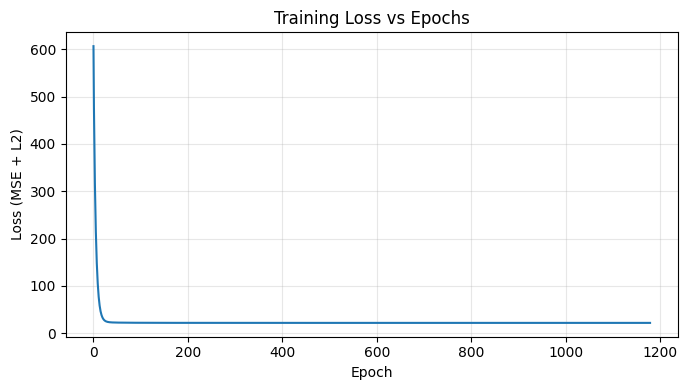

In [27]:
#  Visualizations
plt.figure(figsize=(7, 4))
plt.plot(model.loss_history_)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE + L2)")
plt.title("Training Loss vs Epochs")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


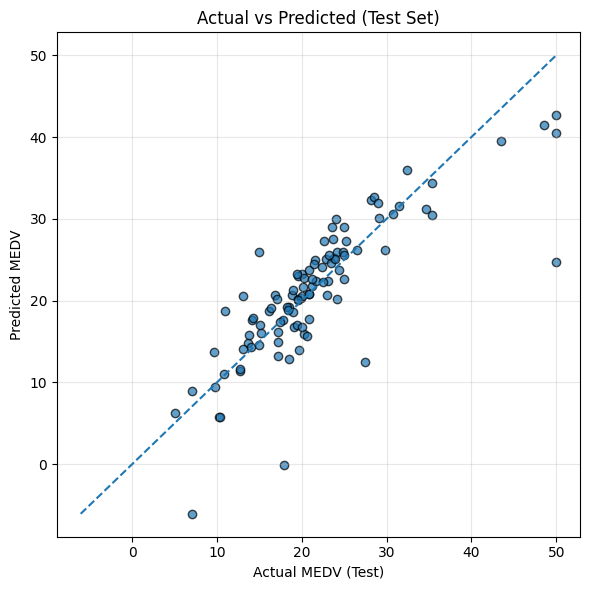

In [28]:

plt.figure(figsize=(6, 6))
plt.scatter(y_te_np, y_pred_test, alpha=0.7, edgecolor='k')
ymin, ymax = min(y_te_np.min(), y_pred_test.min()), max(y_te_np.max(), y_pred_test.max())
plt.plot([ymin, ymax], [ymin, ymax], ls="--")
plt.xlabel("Actual MEDV (Test)")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted (Test Set)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


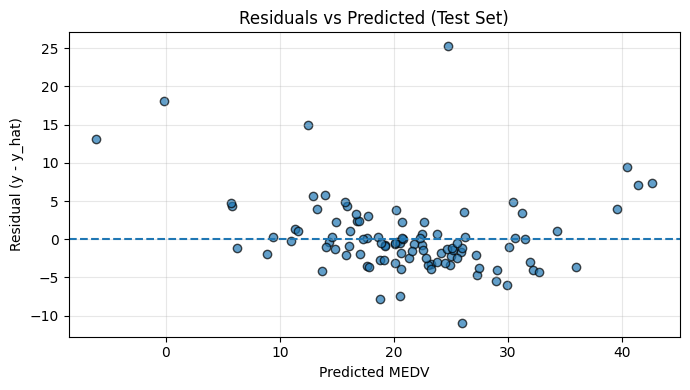

In [29]:
residuals = y_te_np - y_pred_test
plt.figure(figsize=(7, 4))
plt.scatter(y_pred_test, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, ls="--")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residual (y - y_hat)")
plt.title("Residuals vs Predicted (Test Set)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
#  Inspect learned coefficients mapped back to original feature names
coef_series = pd.Series(model.W, index=X_train.columns).sort_values(key=abs, ascending=False)
print("\nTop 10 features by |weight| (on standardized scale):")
print(coef_series.head(10).round(4))


Top 10 features by |weight| (on standardized scale):
LSTAT     -3.6111
RM         3.1456
DIS       -3.0804
RAD        2.2471
PTRATIO   -2.0373
NOX       -2.0210
TAX       -1.7628
B          1.1295
CRIM      -1.0016
CHAS       0.7189
dtype: float64


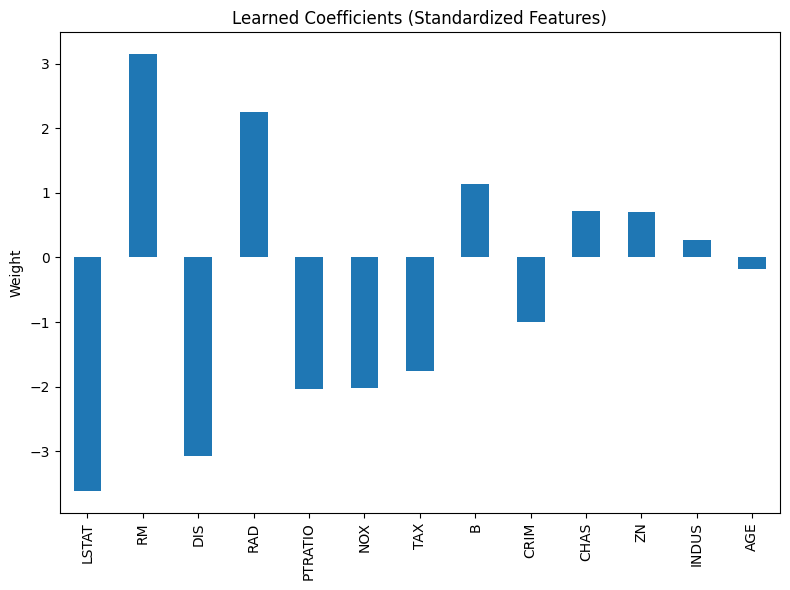

In [31]:
#  bar plot of coefficients:
plt.figure(figsize=(8, 6))
coef_series.plot(kind="bar")
plt.title("Learned Coefficients (Standardized Features)")
plt.ylabel("Weight")
plt.tight_layout()
plt.show()

# CONCLUSION:-
#Hence,we applied linear regression model in the dataset and predicted the output values by using RMSE,Ridge regularizaton(L2) and R-square.
#Our R-square values is nearly 0.6687 which is good.
#The more the value R-square nearer to 1---------->The more well our model fit in the datapoints.
#NOTE:-Greater value of R-square not always sure that our model is good and generalizing the data,it can also be increased due to the more number of features(some of them may be irrelevant also).
#NOTE:-We have used L2 regularization because in this dataset every feature is somewhere relevant and important,we can handle their contributions or importances by controlling their coefficents(more important features have greater coefficient than the leee important features).